In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D, Dropout
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [ ]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Real.zip -d /content/Real
!unzip /content/drive/MyDrive/Fake.zip -d /content/Fake

Streaming output truncated to the last 5000 lines.
  inflating: /content/Fake/Compressed Images fake/seed72730.png  
  inflating: /content/Fake/Compressed Images fake/seed72731.png  
  inflating: /content/Fake/Compressed Images fake/seed72732.png  
  inflating: /content/Fake/Compressed Images fake/seed72733.png  
  inflating: /content/Fake/Compressed Images fake/seed72734.png  
  inflating: /content/Fake/Compressed Images fake/seed72735.png  
  inflating: /content/Fake/Compressed Images fake/seed72736.png  
  inflating: /content/Fake/Compressed Images fake/seed72737.png  
  inflating: /content/Fake/Compressed Images fake/seed72738.png  
  inflating: /content/Fake/Compressed Images fake/seed72739.png  
  inflating: /content/Fake/Compressed Images fake/seed7274.png  
  inflating: /content/Fake/Compressed Images fake/seed72740.png  
  inflating: /content/Fake/Compressed Images fake/seed72741.png  
  inflating: /content/Fake/Compressed Images fake/seed72742.png  
  inflating: /content/Fake

In [ ]:
import os
from sklearn.model_selection import train_test_split

pathr = '/content/Real/real'

images = []
for filename in os.listdir(pathr):
    if filename.endswith('.jpg'):
        images.append(os.path.join(pathr, filename))

train_Rimages, test_Rimages = train_test_split(images, test_size=0.3, random_state=42)

train_path = '/content/Dataset/train/real'
test_path = '/content/Dataset/test/real'
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

for image in train_Rimages:
    os.rename(image, os.path.join(train_path, os.path.basename(image)))

for image in test_Rimages:
    os.rename(image, os.path.join(test_path, os.path.basename(image)))

In [ ]:
pathf = '/content/Fake/fake'

imagesN = []
for filename in os.listdir(pathf):
    if filename.endswith('.png'):
        imagesN.append(os.path.join(pathf, filename))

train_Fimages, test_Fimages = train_test_split(imagesN, test_size=0.3, random_state=42)

train_path = '/content/Dataset/train/fake'
test_path = '/content/Dataset/test/fake'
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

for image in train_Fimages:
    os.rename(image, os.path.join(train_path, os.path.basename(image)))

for image in test_Fimages:
    os.rename(image, os.path.join(test_path, os.path.basename(image)))

In [ ]:
pathTf = '/content/Dataset/test/fake'
# pathTr = '/content/Dataset/test/real'

imagesN = []
for filename in os.listdir(pathTf):
    if filename.endswith('.png'):
        imagesN.append(os.path.join(pathTf,filename))

valid_Fimages, valid_Fimages2 = train_test_split(imagesN, test_size=0.5, random_state=42)

valid_fake_path = '/content/Dataset/valid/fake'
test_fake_path = '/content/Dataset/test2/fake'
os.makedirs(valid_fake_path, exist_ok=True)
os.makedirs(test_fake_path, exist_ok=True)

for image in valid_Fimages:
    os.rename(image, os.path.join(valid_fake_path, os.path.basename(image)))

for image in valid_Fimages2:
    os.rename(image, os.path.join(test_fake_path, os.path.basename(image)))

In [ ]:
# pathTf = '/content/Dataset/test/fake'
pathTr = '/content/Dataset/test/real'

imagesN = []
for filename in os.listdir(pathTr):
    if filename.endswith('.jpg'):
        imagesN.append(os.path.join(pathTr,filename))

valid_Rimages, valid_Rimages2 = train_test_split(imagesN, test_size=0.5, random_state=42)

valid_real_path = '/content/Dataset/valid/real'
test_real_path = '/content/Dataset/test2/real'
os.makedirs(valid_real_path, exist_ok=True)
os.makedirs(test_real_path, exist_ok=True)

for image in valid_Rimages:
    os.rename(image, os.path.join(valid_real_path, os.path.basename(image)))

for image in valid_Rimages2:
    os.rename(image, os.path.join(test_real_path, os.path.basename(image)))

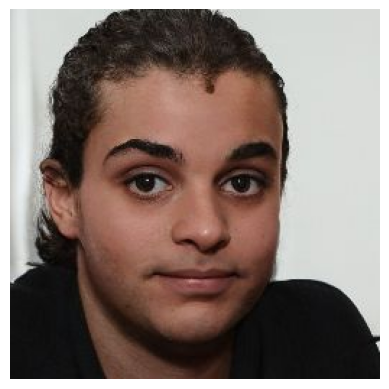

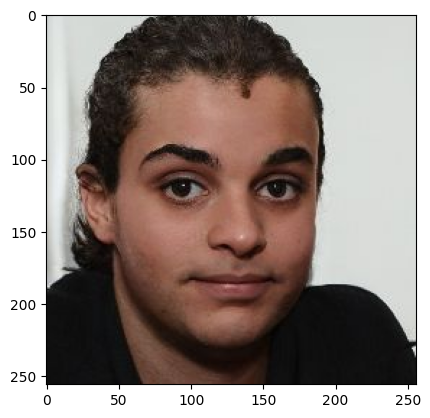

In [ ]:
image= cv2.imread('/content/Dataset/train/fake/seed10002.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

width,height=256,256
resized_img=cv2.resize(image, (width,height))
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))

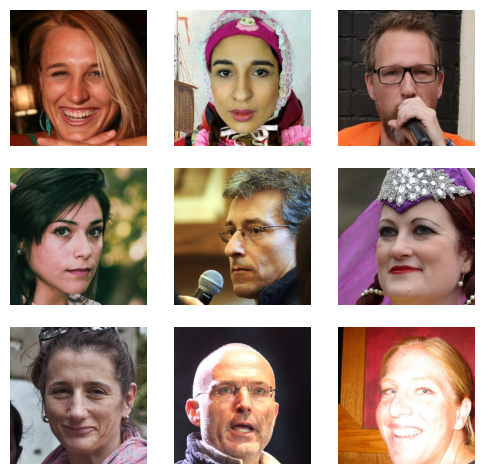

In [ ]:
import matplotlib.image as mpimg

image_paths = [
    '/content/Dataset/train/real/00001.jpg',
    '/content/Dataset/train/real/00004.jpg',
    '/content/Dataset/train/real/00005.jpg',
    '/content/Dataset/train/real/00122.jpg',
    '/content/Dataset/train/real/00024.jpg',
    '/content/Dataset/train/real/00170.jpg',
    '/content/Dataset/train/real/00133.jpg',
    '/content/Dataset/train/real/00031.jpg',
    '/content/Dataset/train/real/00032.jpg',
]

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1)

for i, ax in enumerate(axes.ravel()):
    if i < len(image_paths):
        img = mpimg.imread(image_paths[i])
        ax.imshow(img)
        ax.axis('off')

plt.show()


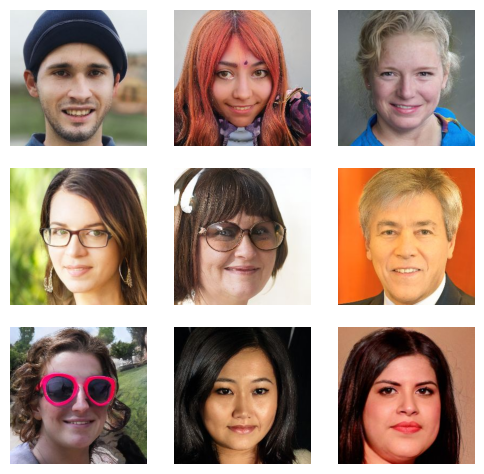

In [ ]:
image_paths = [
    '/content/Dataset/train/fake/seed10153.png',
    '/content/Dataset/train/fake/seed10154.png',
    '/content/Dataset/train/fake/seed10173.png',
    '/content/Dataset/train/fake/seed10156.png',
    '/content/Dataset/train/fake/seed10158.png',
    '/content/Dataset/train/fake/seed10160.png',
    '/content/Dataset/train/fake/seed10162.png',
    '/content/Dataset/train/fake/seed10165.png',
    '/content/Dataset/train/fake/seed10167.png',
]

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1)

for i, ax in enumerate(axes.ravel()):
    if i < len(image_paths):
        img = cv2.imread(image_paths[i])
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

plt.show()


In [ ]:
from tensorflow.keras.layers import LayerNormalization

In [ ]:
input_shape = (256,256,3)
epsilon=0.001

model = Sequential()
model.add(LayerNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(LayerNormalization())

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(LayerNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(LayerNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(LayerNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(LayerNormalization())
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization (Layer  (None, 256, 256, 3)       6         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 layer_normalization_1 (Lay  (None, 128, 128, 16)      32        
 erNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                        

In [ ]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6)

model.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
]

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator (rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/train/',
                              target_size=(256,256),
                              batch_size =64,
                              class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Dataset/test2/',
                                                 target_size=(256,256),
                                                 batch_size =1,
                                                 class_mode = 'binary')

valid_set = valid_datagen.flow_from_directory('Dataset/valid/',
                                              target_size = (256,256),
                                              batch_size =64,
                                              class_mode ='binary')

Found 98000 images belonging to 2 classes.
Found 21001 images belonging to 2 classes.
Found 21000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=1525,
        epochs=5,
        validation_data=valid_set,
        validation_steps=327,
        callbacks = callbacks_list
    )

<ipython-input-16-a4fffc291242>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
1525/1525 [==============================] - 691s 441ms/step - loss: 0.6158 - accuracy: 0.6371 - val_loss: 0.5528 - val_accuracy: 0.7169
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1525/1525 [==============================] - 670s 439ms/step - loss: 0.2165 - accuracy: 0.9095 - val_loss: 0.2867 - val_accuracy: 0.8885
Epoch 3/5
1525/1525 [==============================] - 676s 443ms/step - loss: 0.1023 - accuracy: 0.9605 - val_loss: 0.0760 - val_accuracy: 0.9724
Epoch 4/5
1525/1525 [==============================] - 670s 439ms/step - loss: 0.0529 - accuracy: 0.9806 - val_loss: 0.0885 - val_accuracy: 0.9687
Epoch 5/5
1525/1525 [==============================] - 670s 439ms/step - loss: 0.0325 - accuracy: 0.9879 - val_loss: 0.0507 - val_accuracy: 0.9800


Text(0.5, 0, '# of epochs')

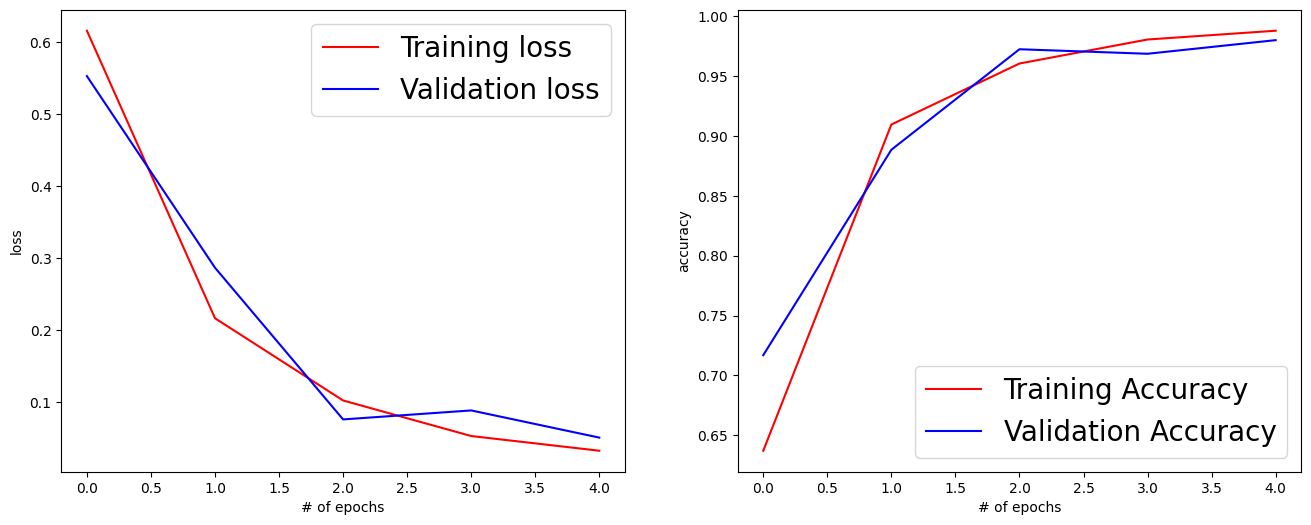

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='Training loss')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='Validation loss')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='Training Accuracy')
plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='Validation Accuracy')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

In [ ]:
y_pred = model.predict(test_set)
y_test = test_set.classes

21001/21001 [==============================] - 190s 9ms/step


In [ ]:
def ImagePrediction(loc):

    test_image = tf.keras.preprocessing.image.load_img(loc, target_size = (256,256))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)

1/1 [==============================] - 0s 25ms/step
Prediction:  Fake


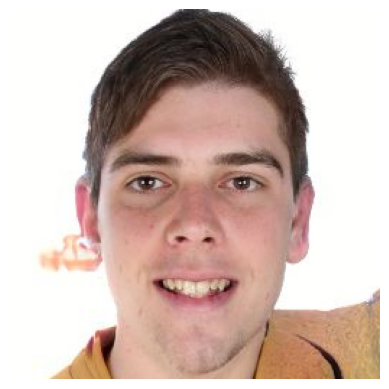

In [ ]:
pathP='/content/Dataset/valid/fake/seed10042.png'
ImagePrediction(pathP)

1/1 [==============================] - 0s 56ms/step
Prediction:  Fake


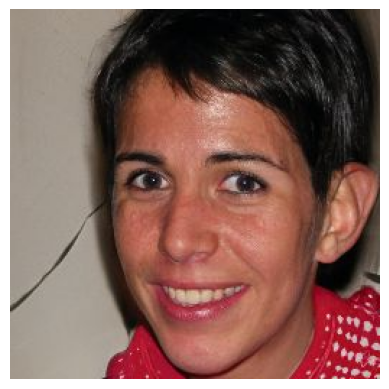

In [ ]:
pathP='/content/Dataset/valid/fake/seed10021.png'
ImagePrediction(pathP)

1/1 [==============================] - 0s 25ms/step
Prediction:  Fake


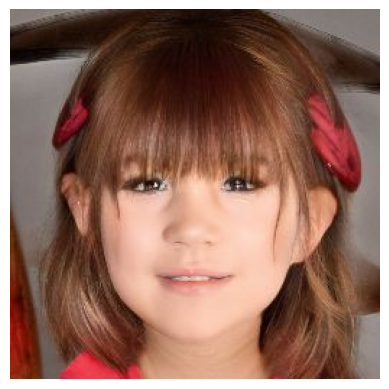

In [ ]:
pathP='/content/Dataset/valid/fake/seed10028.png'
ImagePrediction(pathP)

1/1 [==============================] - 0s 35ms/step
Prediction:  Real


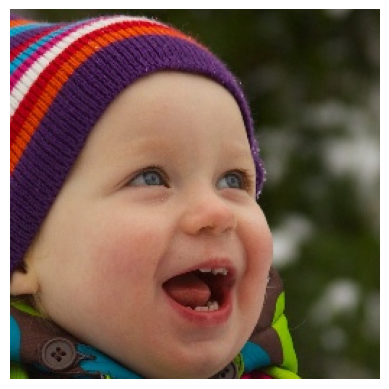

In [ ]:
pathP='/content/Dataset/valid/real/00038.jpg'
ImagePrediction(pathP)

1/1 [==============================] - 0s 71ms/step
Prediction:  Real


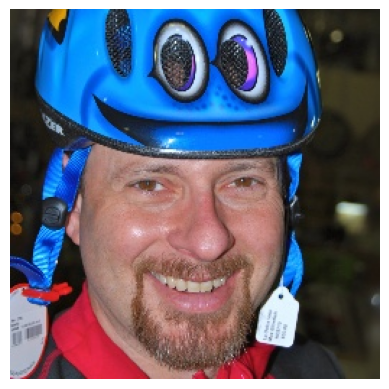

In [ ]:
pathP='/content/Dataset/valid/real/00036.jpg'
ImagePrediction(pathP)

1/1 [==============================] - 1s 1s/step
Prediction:  Real


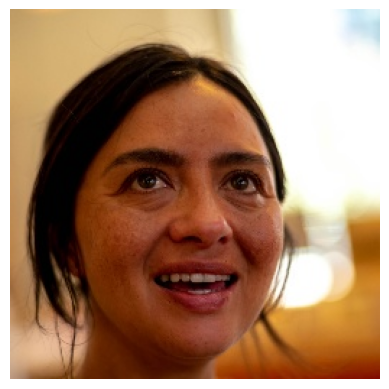

In [ ]:
pathP='/content/Dataset/valid/real/00017.jpg'
ImagePrediction(pathP)